# Exercício EDA - Unesco

Análises estatísticas do arquivo

In [1]:
#Import das bibliotecas padrão
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Criação do DataFrame
df = pd.read_csv('EDULIT_DS.csv')

/home/andre/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Entendimento da estrutura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   EDULIT_IND  1000000 non-null  object 
 1   Indicator   1000000 non-null  object 
 2   LOCATION    1000000 non-null  object 
 3   Country     1000000 non-null  object 
 4   TIME        1000000 non-null  int64  
 5   Time        1000000 non-null  int64  
 6   Value       666702 non-null   float64
 7   Flag Codes  351944 non-null   object 
 8   Flags       351944 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 68.7+ MB


In [3]:
#Checando estatísticas básicas
df.describe(include='all')

,EDULIT_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
count,1000000.0,1000000,1000000,1000000,1000000.000000,1000000.000000,6.667020e+05,351944,351944
unique,687.0,453,241,241,NaN,NaN,NaN,10,10
top,20062.0,Theoretical duration of primary education (years),KOR,Republic of Korea,NaN,NaN,NaN,n,Magnitude nil or negligible
freq,8074.0,10929,8873,8873,NaN,NaN,NaN,204761,204761
mean,NaN,NaN,NaN,NaN,2002.771168,2002.771168,2.985317e+05,NaN,NaN
std,NaN,NaN,NaN,NaN,12.089008,12.089008,2.480764e+06,NaN,NaN
min,NaN,NaN,NaN,NaN,1970.000000,1970.000000,5.810000e-03,NaN,NaN
25%,NaN,NaN,NaN,NaN,1999.000000,1999.000000,2.400000e+01,NaN,NaN
50%,NaN,NaN,NaN,NaN,2006.000000,2006.000000,2.702000e+03,NaN,NaN
75%,NaN,NaN,NaN,NaN,2012.000000,2012.000000,6.077450e+04,NaN,NaN


In [5]:
#Primeiros registros
df.head()

,EDULIT_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,20060,"Enrolment in pre-primary education, both sexes...",AUS,Australia,1971,1971,184381.0,NaN,NaN
1,20060,"Enrolment in pre-primary education, both sexes...",AUS,Australia,1974,1974,182545.0,NaN,NaN
2,20060,"Enrolment in pre-primary education, both sexes...",AUS,Australia,1975,1975,186652.0,NaN,NaN
3,20060,"Enrolment in pre-primary education, both sexes...",AUS,Australia,1976,1976,203146.0,NaN,NaN
4,20060,"Enrolment in pre-primary education, both sexes...",AUS,Australia,1977,1977,203114.0,NaN,NaN


In [6]:
df['Time'].unique()

array([1971, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 1972, 1973,
       1998, 1999, 2000, 1970, 2018, 2019], dtype=int64)

In [7]:
#Excluindo uma das colunas de tempo
del df['TIME']
df.head()

,EDULIT_IND,Indicator,LOCATION,Country,Time,Value,Flag Codes,Flags
0,20060,"Enrolment in pre-primary education, both sexes...",AUS,Australia,1971,184381.0,NaN,NaN
1,20060,"Enrolment in pre-primary education, both sexes...",AUS,Australia,1974,182545.0,NaN,NaN
2,20060,"Enrolment in pre-primary education, both sexes...",AUS,Australia,1975,186652.0,NaN,NaN
3,20060,"Enrolment in pre-primary education, both sexes...",AUS,Australia,1976,203146.0,NaN,NaN
4,20060,"Enrolment in pre-primary education, both sexes...",AUS,Australia,1977,203114.0,NaN,NaN


In [8]:
#Verificando quantidade de Indicadores
df['Indicator'].nunique()

453

In [9]:
#Verificando a descrição dos indicadores
df['Indicator'].unique()

array(['Enrolment in pre-primary education, both sexes (number)',
       'Enrolment in pre-primary education, female (number)',
       'Enrolment in primary education, both sexes (number)',
       'Enrolment in primary education, female (number)',
       'Enrolment in lower secondary education, both sexes (number)',
       'Enrolment in lower secondary education, female (number)',
       'Enrolment in upper secondary education, both sexes (number)',
       'Enrolment in upper secondary education, female (number)',
       'Enrolment in secondary education, both sexes (number)',
       'Enrolment in secondary education, female (number)',
       'Enrolment in post-secondary non-tertiary education, both sexes (number)',
       'Enrolment in post-secondary non-tertiary education, female (number)',
       'Enrolment in lower secondary general, both sexes (number)',
       'Enrolment in lower secondary general, female (number)',
       'Enrolment in lower secondary vocational, both sexes (num

In [10]:
#Analisando a variável Value
df['Value'].describe()

count    6.667020e+05
mean     2.985317e+05
std      2.480764e+06
min      5.810000e-03
25%      2.400000e+01
50%      2.702000e+03
75%      6.077450e+04
max      1.509410e+08
Name: Value, dtype: float64

In [11]:
#Verificando nulos
print(pd.isnull(df).sum())

EDULIT_IND         0
Indicator          0
LOCATION           0
Country            0
Time               0
Value         333298
Flag Codes    648056
Flags         648056
dtype: int64


In [12]:
#removendo nulos
total_orig = df.shape[0]
df = df.dropna(subset=['Value'], how='all')

In [13]:
print('Antes havia ' + str(total_orig) + ' linhas. Sobraram ' + str(df.shape[0]))

Antes havia 1000000 linhas. Sobraram 666702


In [14]:
#Separando o indicador a ser estudado
df_analise = df[df['Indicator'] == 'Enrolment in primary education, both sexes (number)']
df_analise.head()

,EDULIT_IND,Indicator,LOCATION,Country,Time,Value,Flag Codes,Flags
11369,20062,"Enrolment in primary education, both sexes (nu...",AUS,Australia,1971,1685671.0,NaN,NaN
11370,20062,"Enrolment in primary education, both sexes (nu...",AUS,Australia,1972,1682318.0,NaN,NaN
11371,20062,"Enrolment in primary education, both sexes (nu...",AUS,Australia,1973,1672939.0,NaN,NaN
11372,20062,"Enrolment in primary education, both sexes (nu...",AUS,Australia,1974,1596281.0,NaN,NaN
11373,20062,"Enrolment in primary education, both sexes (nu...",AUS,Australia,1975,1632716.0,NaN,NaN


In [15]:
df_analise.corr()

,Time,Value
Time,1.000000,0.026599
Value,0.026599,1.000000


In [16]:
df_analise['Flags'].unique()

array([nan, 'UIS Estimation', 'National Estimation'], dtype=object)

<AxesSubplot:xlabel='Time', ylabel='Value'>

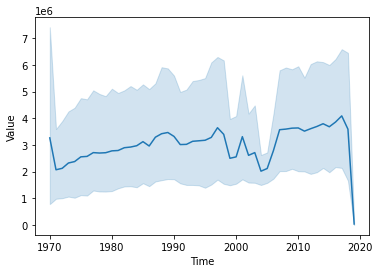

In [17]:
sns.lineplot(x= 'Time', y = 'Value', data = df_analise)

<AxesSubplot:xlabel='Time', ylabel='Value'>

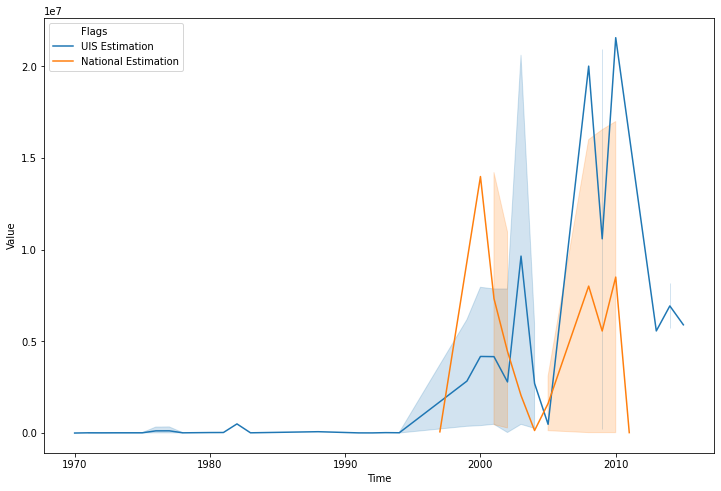

In [18]:
plt.figure(figsize= (12,8))
sns.lineplot(x= 'Time', y = 'Value', data = df_analise, hue = 'Flags')

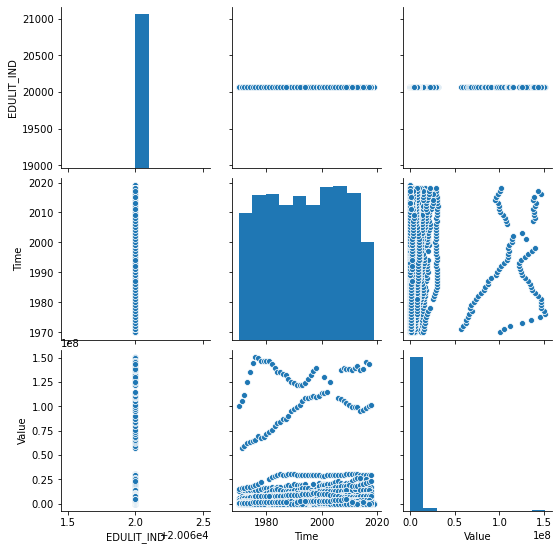

In [19]:
#Gráfico para analisar correlações
sns.pairplot(df_analise)

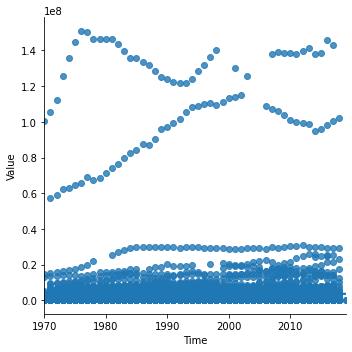

In [20]:
#Gráfico de Regrressão
sns.lmplot(x= 'Time', y = 'Value', data = df_analise)

## Conclusão

O dataset possuí uma quantidade significativa de indicadores (493 no total).
No começo da análise excluímos uma das variáveis de tempo, pois elas continham a mesma informação.
Foi feita também a exclusão de valores nulos do campo "Value".

Após esses passos fizemos alguns gráficos para entendimento de correlações e distribuições dos dados.
Chegamos a conclusão que o indicador anão possuí uma correlação relevante.
Seria interessante cruzar essa base com outros indicadores para extrair informações relevantes.